# 회귀 - 캘리포니아 하우징

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [ ]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['Price'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape    # feature 8개(df.iloc[:, :-1]) / target 1개(df.Price)

(20640, 9)

In [ ]:
df.isna().sum().sum() # 결측치 없음

0

### Train/Test dataset 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.1, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

### 모델 정의/설정/학습

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Model2

In [ ]:
model2 = Sequential([
    Dense(60, input_dim=8, activation='relu'),
    Dense(40, activation='relu'),
    Dense(20, activation='relu'),
    Dense(12, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

In [ ]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_path = 'califonia_house2.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=30)

In [ ]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=500, batch_size=100, verbose=0,
                   callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 1.57022, saving model to califonia_house2.h5

Epoch 00002: val_loss improved from 1.57022 to 1.26314, saving model to califonia_house2.h5

Epoch 00003: val_loss improved from 1.26314 to 1.05951, saving model to califonia_house2.h5

Epoch 00004: val_loss improved from 1.05951 to 0.95152, saving model to califonia_house2.h5

Epoch 00005: val_loss did not improve from 0.95152

Epoch 00006: val_loss did not improve from 0.95152

Epoch 00007: val_loss improved from 0.95152 to 0.71425, saving model to califonia_house2.h5

Epoch 00008: val_loss did not improve from 0.71425

Epoch 00009: val_loss did not improve from 0.71425

Epoch 00010: val_loss did not improve from 0.71425

Epoch 00011: val_loss did not improve from 0.71425

Epoch 00012: val_loss improved from 0.71425 to 0.68047, saving model to califonia_house2.h5

Epoch 00013: val_loss did not improve from 0.68047

Epoch 00014: val_loss improved from 0.68047 to 0.62589, saving model to califonia

### 학습 과정 시각화

In [ ]:
y_loss = hist2.history['loss']
y_vloss = hist2.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

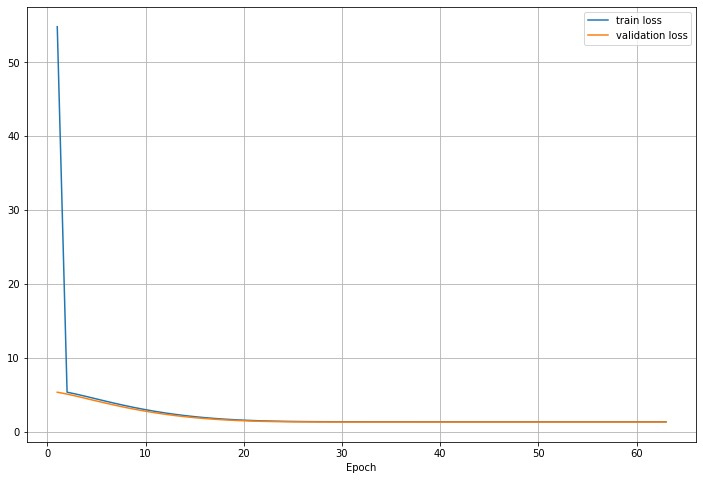

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

### 평가

In [ ]:
pred2 = model2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, pred2), r2_score(y_test, pred2)

(0.5134536435832012, 0.5999334823306801)

### Model3

In [ ]:
model3 = Sequential([
    Dense(42, input_dim=8, activation='relu'),
    Dense(30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1)
])

In [ ]:
model3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_path3 = 'califonia_house3.h5'
checkpoint = ModelCheckpoint(
    model_path3, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=30)

In [ ]:
hist3 = model3.fit(X_train, y_train, validation_split=0.2,
                   epochs=300, batch_size=60, verbose=0,
                   callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 1.38191, saving model to califonia_house3.h5

Epoch 00002: val_loss improved from 1.38191 to 1.35537, saving model to califonia_house3.h5

Epoch 00003: val_loss improved from 1.35537 to 1.26120, saving model to califonia_house3.h5

Epoch 00004: val_loss did not improve from 1.26120

Epoch 00005: val_loss improved from 1.26120 to 1.07705, saving model to califonia_house3.h5

Epoch 00006: val_loss did not improve from 1.07705

Epoch 00007: val_loss improved from 1.07705 to 0.87518, saving model to califonia_house3.h5

Epoch 00008: val_loss improved from 0.87518 to 0.82940, saving model to califonia_house3.h5

Epoch 00009: val_loss did not improve from 0.82940

Epoch 00010: val_loss did not improve from 0.82940

Epoch 00011: val_loss improved from 0.82940 to 0.81407, saving model to califonia_house3.h5

Epoch 00012: val_loss improved from 0.81407 to 0.77929, saving model to califonia_house3.h5

Epoch 00013: val_loss improved from 0.77929 to 0.76

In [ ]:
y_loss = hist3.history['loss']
y_vloss = hist3.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

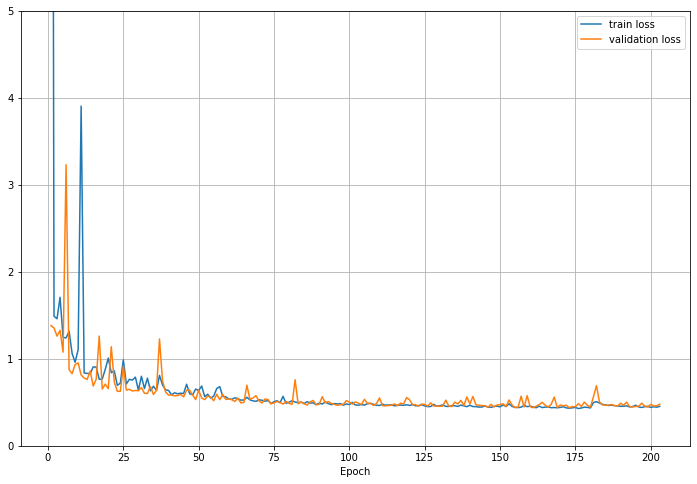

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,5])
plt.xlabel('Epoch')
plt.show()

In [ ]:
pred3 = model3.predict(X_test)
mean_squared_error(y_test, pred3), r2_score(y_test, pred3)

(0.4805151719062898, 0.6255980770332712)

### Model4

In [ ]:
model4 = Sequential([
    Dense(42, input_dim=8, activation='relu'),
    Dense(36, activation='relu'),
    Dense(24, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 42)                378       
                                                                 
 dense_25 (Dense)            (None, 36)                1548      
                                                                 
 dense_26 (Dense)            (None, 24)                888       
                                                                 
 dense_27 (Dense)            (None, 16)                400       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,359
Trainable params: 3,359
Non-traina

In [ ]:
model4.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_path4 = 'califonia_house4.h5'
checkpoint = ModelCheckpoint(
    model_path4, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=30)

In [ ]:
hist4 = model4.fit(X_train, y_train, validation_split=0.2,
                   epochs=400, batch_size=60, verbose=0,
                   callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 1.30797, saving model to califonia_house4.h5

Epoch 00002: val_loss improved from 1.30797 to 1.24164, saving model to califonia_house4.h5

Epoch 00003: val_loss improved from 1.24164 to 1.17319, saving model to califonia_house4.h5

Epoch 00004: val_loss improved from 1.17319 to 0.89727, saving model to califonia_house4.h5

Epoch 00005: val_loss improved from 0.89727 to 0.87950, saving model to califonia_house4.h5

Epoch 00006: val_loss improved from 0.87950 to 0.75053, saving model to califonia_house4.h5

Epoch 00007: val_loss did not improve from 0.75053

Epoch 00008: val_loss did not improve from 0.75053

Epoch 00009: val_loss did not improve from 0.75053

Epoch 00010: val_loss improved from 0.75053 to 0.70162, saving model to califonia_house4.h5

Epoch 00011: val_loss did not improve from 0.70162

Epoch 00012: val_loss improved from 0.70162 to 0.65974, saving model to califonia_house4.h5

Epoch 00013: val_loss did not improve from 0.65974


In [ ]:
y_loss = hist4.history['loss']
y_vloss = hist4.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

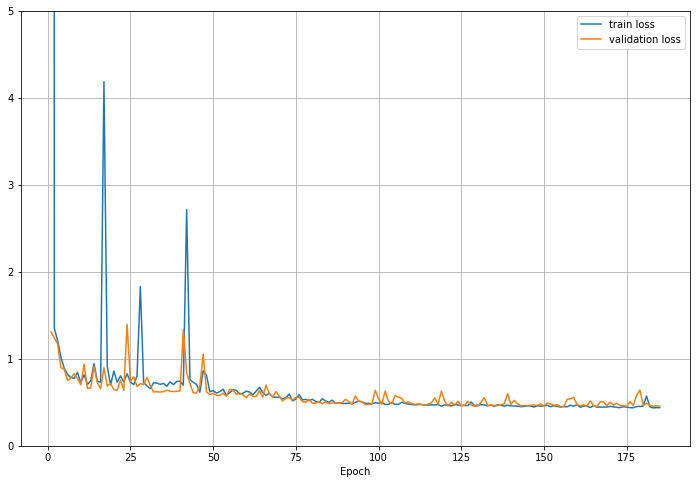

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,5])
plt.xlabel('Epoch')
plt.show()

In [ ]:
pred4 = model4.predict(X_test)
mean_squared_error(y_test, pred4), r2_score(y_test, pred4)

(0.4574314778093393, 0.6435841469107058)

### Model5

In [ ]:
model5 = Sequential([
    Dense(72, input_dim=8, activation='relu'),
    Dense(54, activation='relu'),
    Dense(45, activation='relu'),
    Dense(27, activation='relu'),
    Dense(9, activation='relu'),
    Dense(1)
])
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 72)                648       
                                                                 
 dense_57 (Dense)            (None, 54)                3942      
                                                                 
 dense_58 (Dense)            (None, 45)                2475      
                                                                 
 dense_59 (Dense)            (None, 27)                1242      
                                                                 
 dense_60 (Dense)            (None, 9)                 252       
                                                                 
 dense_61 (Dense)            (None, 1)                 10        
                                                                 
Total params: 8,569
Trainable params: 8,569
Non-train

In [ ]:
model5.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_path5 = 'califonia_house5.h5'
checkpoint = ModelCheckpoint(
    model_path5, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=30)

In [ ]:
hist5 = model5.fit(X_train, y_train, validation_split=0.2,
                   epochs=500, batch_size=120, verbose=0,
                   callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 1.41184, saving model to califonia_house5.h5

Epoch 00002: val_loss improved from 1.41184 to 1.38306, saving model to califonia_house5.h5

Epoch 00003: val_loss did not improve from 1.38306

Epoch 00004: val_loss improved from 1.38306 to 1.36484, saving model to califonia_house5.h5

Epoch 00005: val_loss improved from 1.36484 to 1.34792, saving model to califonia_house5.h5

Epoch 00006: val_loss improved from 1.34792 to 1.34106, saving model to califonia_house5.h5

Epoch 00007: val_loss did not improve from 1.34106

Epoch 00008: val_loss improved from 1.34106 to 1.30374, saving model to califonia_house5.h5

Epoch 00009: val_loss did not improve from 1.30374

Epoch 00010: val_loss improved from 1.30374 to 1.30345, saving model to califonia_house5.h5

Epoch 00011: val_loss improved from 1.30345 to 1.23513, saving model to califonia_house5.h5

Epoch 00012: val_loss did not improve from 1.23513

Epoch 00013: val_loss improved from 1.23513 to 1.06

In [ ]:
y_loss = hist5.history['loss']
y_vloss = hist5.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

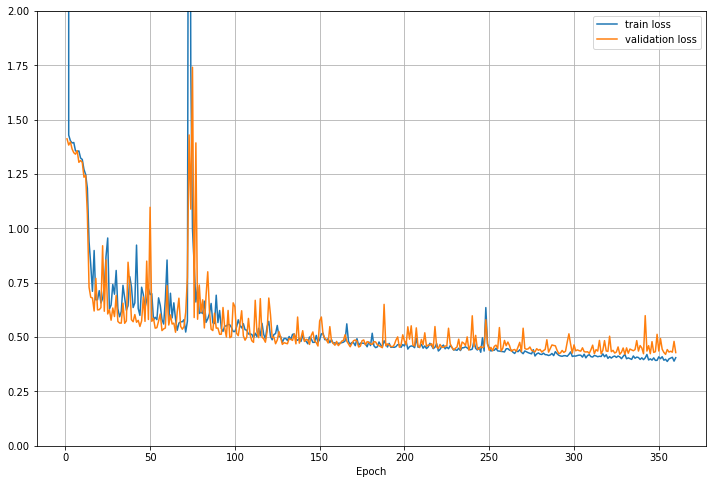

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,2])
plt.xlabel('Epoch')
plt.show()

In [ ]:
pred5 = model5.predict(X_test)
mean_squared_error(y_test, pred5), r2_score(y_test, pred5)

(0.4356119771999036, 0.6605851979991397)

### 예측치 비교

In [ ]:
df = pd.DataFrame({
    'y_test':y_test, 'pred2':pred2.flatten(), 'pred3': pred3.flatten(), 
    'pred4' : pred4.flatten(), 'pred5' : pred5.flatten()
})
df.head(10)

,y_test,pred2,pred3,pred4,pred5
0,4.771,4.693309,4.039068,4.368263,4.841084
1,1.371,1.453598,1.133648,1.037990,1.222660
2,1.233,1.667919,1.476432,1.228215,1.504924
3,0.938,1.179496,1.089940,1.139317,1.150541
4,3.260,3.592041,3.121176,3.421309,3.290085
5,1.516,1.692117,1.492504,1.474833,1.643800
6,2.738,2.568876,2.130406,2.358180,2.363109
7,1.368,1.837786,1.691271,1.690741,1.833998
8,1.175,1.137329,1.027102,0.846777,1.120677
9,2.966,2.990885,2.575246,2.725438,2.588422


### 모델 저장

In [129]:
model5.save('Califonia.h5')

### 테스트 프로그램

In [ ]:
index = 9
X_test[index], y_test[index]

(array([   5.1587    ,   36.        ,    5.99692308,    0.98153846,
         909.        ,    2.79692308,   33.94      , -118.11      ]), 2.966)

In [ ]:
model5.predict(X_test[index].reshape(1,-1))

array([[2.588422]], dtype=float32)

In [ ]:
pred_value = model5.predict(X_test[index].reshape(1,-1)) # 2차원 값 입력 必
print(f'실제값 : {y_test[index]}, 예측값 : {pred_value[0,0]:.2f}, 오차 : {y_test[index] - pred_value[0,0]:.2f}')

실제값 : 2.966, 예측값 : 2.59, 오차 : 0.38
